# Interpolated modles comparison, error calculations and model correlations

In this notebook firstly for ASV data ELEVATION is calculated, both Valle (Utsjoki) and Nuorgam separately. For ALS data the ELEVATION is from IDW column. In Valle ALS data it is however from HEIGHT column. Then a correlation is performed to see wether IDW or TIN model is better in case of ASV, because PDAL Pipeline does IDW interpolation for ALS point cloud. Then lastly, a correlation between ASV and ALS is done from random points.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score

## Valle (Utsjoki) elevation calculation IDW

In [2]:
valle_asv = pd.read_csv('../data/output/0.25/valle_ASV_validation_table.csv', delimiter=',')

In [3]:
valle_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfPo,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,3,24,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,-2.185422
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,3,23,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,-2.295642
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,3,23,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,-2.227414
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,3,23,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,-2.275396
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,4,23,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,-2.236089
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,4,24,18.6.2023,10:36:38.000,7:36:38,2267,27415,2267,27418,-2.167507
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,4,24,18.6.2023,10:37:06.000,7:37:06,2267,27443,2267,27446,-2.068015
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,4,24,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-2.043428
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,3,24,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.909540
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,3,24,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.478516


In [4]:
valle_asv['PointLocation_Elevation'] = 66.016000

In [5]:
valle_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,PointLocation_Elevation
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,24,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,-2.185422,66.016
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,23,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,-2.295642,66.016
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,23,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,-2.227414,66.016
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,23,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,-2.275396,66.016
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,23,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,-2.236089,66.016
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,24,18.6.2023,10:36:38.000,7:36:38,2267,27415,2267,27418,-2.167507,66.016
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,24,18.6.2023,10:37:06.000,7:37:06,2267,27443,2267,27446,-2.068015,66.016
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,24,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-2.043428,66.016
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,24,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.909540,66.016
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,24,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.478516,66.016


In [6]:
valle_asv = valle_asv.rename(columns={"SAMPLE_1": "ASV_Depth"})

In [7]:
valle_asv['ASV_Elevation'] = valle_asv['PointLocation_Elevation'] + valle_asv['ASV_Depth']

In [8]:
valle_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,ASV_Depth,PointLocation_Elevation,ASV_Elevation
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,-2.185422,66.016,63.830578
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,-2.295642,66.016,63.720358
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,-2.227414,66.016,63.788586
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,-2.275396,66.016,63.740604
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,-2.236089,66.016,63.779911
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,18.6.2023,10:36:38.000,7:36:38,2267,27415,2267,27418,-2.167507,66.016,63.848493
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,18.6.2023,10:37:06.000,7:37:06,2267,27443,2267,27446,-2.068015,66.016,63.947985
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-2.043428,66.016,63.972572
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.909540,66.016,64.106460
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.478516,66.016,64.537484


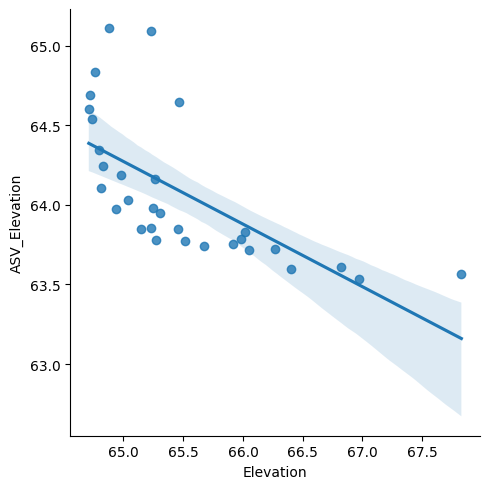

In [77]:
sns.lmplot(x="Elevation", y="ASV_Elevation", data=valle_asv)

## Compute RMSE, MAE and MAXE, R2

In [10]:
valle_asv_actual = valle_asv['Elevation'].values.tolist()
valle_asv_actual

[66.016,
 66.272,
 65.981,
 65.67,
 65.275,
 65.144,
 65.307,
 64.937,
 64.808,
 64.737,
 64.722,
 64.71,
 64.797,
 64.832,
 64.981,
 65.249,
 65.037,
 65.233,
 65.515,
 66.05,
 65.455,
 65.916,
 65.268,
 65.227,
 65.464,
 64.875,
 64.766,
 66.82,
 67.828,
 66.975,
 66.404]

In [11]:
valle_asv_predicted = valle_asv['ASV_Elevation'].values.tolist()
valle_asv_predicted

[63.830578100000004,
 63.72035770000001,
 63.78858640000001,
 63.74060370000001,
 63.7799108,
 63.84849330000001,
 63.947985100000004,
 63.97257210000001,
 64.1064604,
 64.5374841,
 64.68916200000001,
 64.6009731,
 64.34641300000001,
 64.24220220000001,
 64.1866219,
 63.980989900000004,
 64.03128260000001,
 63.856369300000004,
 63.7733113,
 63.71426410000001,
 63.847183900000005,
 63.751977600000004,
 64.16118130000001,
 65.09284051,
 64.64334790000001,
 65.10829601,
 64.83184320000001,
 63.6112516,
 63.566888000000006,
 63.53687970000001,
 63.594449100000006]

In [12]:
MSE = mean_squared_error(valle_asv_actual, valle_asv_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.7838706318406874


In [13]:
MAE = mean_absolute_error(valle_asv_actual, valle_asv_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

1.4331780161290262


In [14]:
# Compute max_error
MAXE = max_error(valle_asv_actual, valle_asv_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

4.261111999999997


In [15]:
# Compute r2
R2 = r2_score(valle_asv_actual, valle_asv_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

-4.737712446007107


## Valle (Utsjoki) elevation calculation TIN

In [16]:
valle_TIN = pd.read_csv('../data/output/0.25/valle_TIN_0.25_validation_table.csv', delimiter=',')

In [17]:
valle_TIN['PointLocation_Elevation'] = 66.016000

In [18]:
valle_TIN = valle_TIN.rename(columns={"SAMPLE_1": "TIN_Depth"})

In [19]:
valle_TIN

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,TIN_Depth,PointLocation_Elevation
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,24,18.6.2023,10:33:18.000,7:33:18,2267,27216,2267,27218,NaN,66.016
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,23,18.6.2023,10:33:38.000,7:33:38,2267,27236,2267,27238,NaN,66.016
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,23,18.6.2023,10:34:10.000,7:34:10,2267,27268,2267,27270,NaN,66.016
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,23,18.6.2023,10:34:39.000,7:34:39,2267,27297,2267,27299,NaN,66.016
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,23,18.6.2023,10:35:05.000,7:35:05,2267,27322,2267,27325,NaN,66.016
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,24,18.6.2023,10:36:38.000,7:36:38,2267,27415,2267,27418,NaN,66.016
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,24,18.6.2023,10:37:06.000,7:37:06,2267,27443,2267,27446,NaN,66.016
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,24,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-1.166749,66.016
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,24,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.173518,66.016
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,24,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.290926,66.016


In [20]:
valle_TIN['ASV_Elevation'] = valle_TIN['PointLocation_Elevation'] + valle_TIN['TIN_Depth']

In [21]:
valle_TIN = valle_TIN.dropna()

In [22]:
valle_TIN

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,TIN_Depth,PointLocation_Elevation,ASV_Elevation
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,18.6.2023,10:37:57.000,7:37:57,2267,27494,2267,27497,-1.166749,66.016,64.849251
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,18.6.2023,10:38:33.000,7:38:33,2267,27531,2267,27533,-1.173518,66.016,64.842482
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,18.6.2023,10:39:08.000,7:39:08,2267,27566,2267,27568,-1.290926,66.016,64.725074
10,valle11,7757616.924,500059.411,64.722,69.925965,27.001551,89.026915,0.007,0.013,1.5,...,18.6.2023,10:39:38.000,7:39:38,2267,27596,2267,27598,-1.160556,66.016,64.855444
11,valle12,7757621.782,500058.338,64.710,69.926008,27.001523,89.015000,0.005,0.011,1.5,...,18.6.2023,10:40:20.000,7:40:20,2267,27638,2267,27640,-1.242703,66.016,64.773297
12,valle13,7757620.598,500056.306,64.797,69.925997,27.001470,89.102403,0.005,0.011,1.5,...,18.6.2023,10:40:55.000,7:40:55,2267,27672,2267,27675,-1.129680,66.016,64.886320
13,valle14,7757619.900,500052.496,64.832,69.925991,27.001370,89.137092,0.005,0.011,1.5,...,18.6.2023,10:41:51.000,7:41:51,2267,27729,2267,27731,-1.077362,66.016,64.938638
14,valle15,7757619.409,500051.109,64.981,69.925987,27.001334,89.286498,0.005,0.011,1.6,...,18.6.2023,10:42:14.000,7:42:14,2267,27751,2267,27753,-0.800669,66.016,65.215331
15,valle16,7757621.391,500047.147,65.249,69.926005,27.001231,89.554811,0.005,0.011,1.6,...,18.6.2023,10:42:39.000,7:42:39,2267,27777,2267,27779,-1.140027,66.016,64.875974
16,valle17,7757629.287,500046.620,65.037,69.926075,27.001217,89.342939,0.005,0.011,1.6,...,18.6.2023,10:43:12.000,7:43:12,2267,27810,2267,27812,-0.989542,66.016,65.026458


In [23]:
valle_TIN_actual = valle_TIN['Elevation'].values.tolist()

In [24]:
valle_TIN_predicted = valle_TIN['ASV_Elevation'].values.tolist()

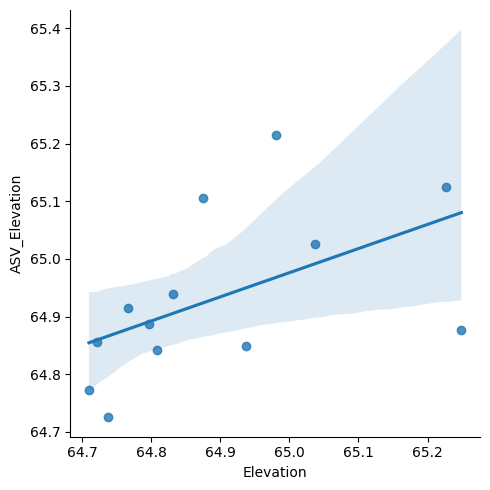

In [25]:
sns.lmplot(x="Elevation", y="ASV_Elevation", data=valle_TIN)

In [26]:
MSE = mean_squared_error(valle_TIN_actual, valle_TIN_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.15939295795653236


In [27]:
MAE = mean_absolute_error(valle_TIN_actual, valle_TIN_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.1251294530769273


In [28]:
# Compute max_error
MAXE = max_error(valle_TIN_actual, valle_TIN_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.3730264999999946


In [29]:
# Compute r2
R2 = r2_score(valle_TIN_actual, valle_TIN_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

0.15749920279426322


## Valle (Utsjoki) ALS

In [30]:
valle_als = pd.read_csv('../data/output/0.25/valle_ALS_validation_table.csv', delimiter=',')

In [31]:
valle_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,valle1,7757608.695,500041.929,66.016,69.925891,27.001095,90.322226,0.005,0.011,1.2,...,2267,27216,2267,27218,90.10,90.87,90.534211,90.529521,19,0.283592
1,valle2,7757602.595,500041.839,66.272,69.925836,27.001092,90.577668,0.005,0.011,1.6,...,2267,27236,2267,27238,90.33,91.17,90.780000,90.763832,19,0.298170
2,valle3,7757600.166,500048.506,65.981,69.925814,27.001266,90.286394,0.005,0.011,1.6,...,2267,27268,2267,27270,90.09,90.89,90.543684,90.501440,19,0.274115
3,valle4,7757596.831,500055.210,65.670,69.925784,27.001441,89.975550,0.005,0.011,1.6,...,2267,27297,2267,27299,89.85,90.70,90.234615,90.273429,13,0.286668
4,valle5,7757597.569,500059.478,65.275,69.925791,27.001553,89.580965,0.005,0.011,1.6,...,2267,27322,2267,27325,89.35,90.12,89.697500,89.776826,12,0.299308
5,valle6,7757599.554,500062.164,65.144,69.925809,27.001623,89.449445,0.005,0.010,1.5,...,2267,27415,2267,27418,89.09,89.91,89.513500,89.484570,20,0.261348
6,valle7,7757602.512,500058.781,65.307,69.925835,27.001534,89.612676,0.006,0.012,1.5,...,2267,27443,2267,27446,89.28,90.08,89.665714,89.627307,14,0.294005
7,valle8,7757603.885,500062.909,64.937,69.925848,27.001642,89.241923,0.005,0.011,1.5,...,2267,27494,2267,27497,88.81,89.82,89.280625,89.283817,16,0.304846
8,valle9,7757607.669,500064.868,64.808,69.925882,27.001693,89.112957,0.005,0.010,1.5,...,2267,27531,2267,27533,88.68,89.72,89.158889,89.119383,18,0.285363
9,valle10,7757612.643,500063.606,64.737,69.925926,27.001660,89.041733,0.005,0.010,1.5,...,2267,27566,2267,27568,88.62,89.38,89.017143,89.018575,14,0.239834


In [32]:
valle_als = valle_als.rename(columns={"SAMPLE_4": "IDW"})

In [33]:
valle_als_actual = valle_als['Height'].values.tolist()

In [34]:
valle_als_predicted = valle_als['IDW'].values.tolist()

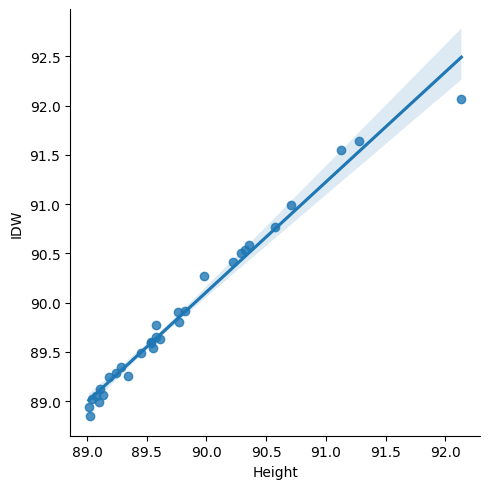

In [35]:
sns.lmplot(x="Height", y="IDW", data=valle_als)

## Compute RMSE, MAE, MAXE, R2

In [36]:
MSE = mean_squared_error(valle_als_actual, valle_als_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.16526257931156874


In [37]:
MAE = mean_absolute_error(valle_als_actual, valle_als_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.12614583495443576


In [38]:
# Compute max_error
MAXE = max_error(valle_als_actual, valle_als_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.427248066521301


In [39]:
# Compute r2
R2 = r2_score(valle_als_actual, valle_als_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

0.9507942822132884


# Nuorgam Elevation calculation ASV IDW

In [40]:
nuorgam_asv = pd.read_csv('../data/output/0.25/nuorgam_ASV_validation_table.csv', delimiter=',')

In [41]:
nuorgam_asv['PointLocation_Elevation'] = 13.395000000000000

In [42]:
nuorgam_asv

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,NumberOfSa,Day,TSC3Time,TSC3UTC,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,PointLocation_Elevation
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,1.3,...,25,17.6.2023,18:13:01.000,15:13:01,2266,573198,2266,573201,-1.571486,13.395
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,1.3,...,25,17.6.2023,18:13:22.000,15:13:22,2266,573217,2266,573221,-1.582583,13.395
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,1.3,...,25,17.6.2023,18:13:43.000,15:13:43,2266,573239,2266,573242,-1.568659,13.395
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,1.3,...,25,17.6.2023,18:14:02.000,15:14:02,2266,573259,2266,573261,-1.579846,13.395
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,1.3,...,25,17.6.2023,18:14:20.000,15:14:20,2266,573277,2266,573279,-1.579843,13.395
5,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,1.3,...,25,17.6.2023,18:14:41.000,15:14:41,2266,573298,2266,573300,-1.607561,13.395
6,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,1.3,...,25,17.6.2023,18:14:59.000,15:14:59,2266,573316,2266,573319,-1.602496,13.395
7,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,1.3,...,25,17.6.2023,18:15:19.000,15:15:19,2266,573336,2266,573339,-1.590459,13.395
8,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,1.3,...,25,17.6.2023,18:15:40.000,15:15:40,2266,573357,2266,573359,-1.578435,13.395
9,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,1.3,...,25,17.6.2023,18:16:04.000,15:16:04,2266,573381,2266,573384,-1.568138,13.395


In [43]:
nuorgam_asv = nuorgam_asv.rename(columns={"SAMPLE_1": "ASV_Depth"})

In [44]:
nuorgam_asv['ASV_Elevation'] = nuorgam_asv['PointLocation_Elevation'] + nuorgam_asv["ASV_Depth"]

In [45]:
nuorgam_asv = nuorgam_asv.dropna()

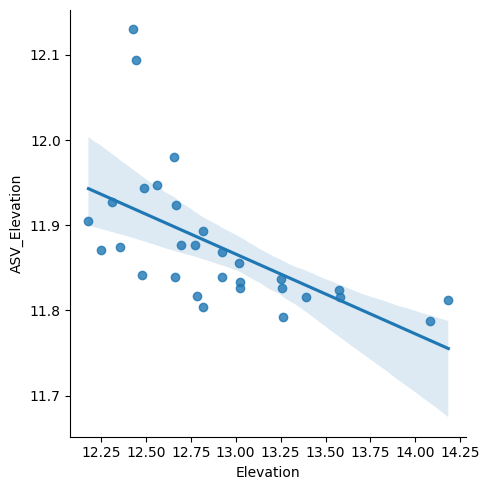

In [46]:
sns.lmplot(x="Elevation", y="ASV_Elevation", data=nuorgam_asv)

## Compute RMSE, MAE, MAXE, R2

In [47]:
nuorgam_asv_actual = nuorgam_asv['Elevation'].values.tolist()

In [48]:
nuorgam_asv_predicted = nuorgam_asv['ASV_Elevation'].values.tolist()

In [49]:
MSE = mean_squared_error(nuorgam_asv_actual, nuorgam_asv_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.1568474726087066


In [50]:
MAE = mean_absolute_error(nuorgam_asv_actual, nuorgam_asv_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

1.0201863400000006


In [51]:
# Compute max_error
MAXE = max_error(nuorgam_asv_actual, nuorgam_asv_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

2.3705827


In [52]:
# Compute r2
R2 = r2_score(nuorgam_asv_actual, nuorgam_asv_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

-4.45726684508327


Nuorgam ASV TIN calculations couldn't be done due to lack of samples (only one (1) validation point reached the TIN interpolation model).

## Nuorgam Elevation calculation ALS

In [53]:
nuorgam_als = pd.read_csv('../data/output/0.25/nuorgam_ALS_validation_table.csv', delimiter=',')

In [54]:
nuorgam_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,1.3,...,2266,573198,2266,573201,13.56,13.82,13.680000,13.688744,6,0.086410
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,1.3,...,2266,573217,2266,573221,13.79,14.26,14.051429,14.062061,7,0.144956
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,1.3,...,2266,573239,2266,573242,13.21,13.32,13.280000,13.286187,5,0.037417
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,1.3,...,2266,573259,2266,573261,13.61,13.68,13.655000,13.643451,4,0.026926
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,1.3,...,2266,573277,2266,573279,13.44,13.51,13.476667,13.468317,3,0.028674
5,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,1.3,...,2266,573298,2266,573300,14.09,15.01,14.519000,14.806798,10,0.293171
6,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,1.3,...,2266,573316,2266,573319,13.25,13.33,13.296000,13.292660,5,0.028000
7,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,1.3,...,2266,573336,2266,573339,12.74,12.84,12.774000,12.776020,5,0.037736
8,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,1.3,...,2266,573357,2266,573359,12.72,12.82,12.760000,12.745913,3,0.043205
9,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,1.3,...,2266,573381,2266,573384,12.98,13.09,13.045000,13.051075,4,0.043875


In [55]:
nuorgam_als = nuorgam_als.rename(columns={"SAMPLE_4": "IDW"})

In [56]:
nuorgam_als

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,StartGPSwe,StartGPSse,EndGPSweek,EndGPSseco,SAMPLE_1,SAMPLE_2,SAMPLE_3,IDW,SAMPLE_5,SAMPLE_6
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,1.3,...,2266,573198,2266,573201,13.56,13.82,13.680000,13.688744,6,0.086410
1,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,1.3,...,2266,573217,2266,573221,13.79,14.26,14.051429,14.062061,7,0.144956
2,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,1.3,...,2266,573239,2266,573242,13.21,13.32,13.280000,13.286187,5,0.037417
3,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,1.3,...,2266,573259,2266,573261,13.61,13.68,13.655000,13.643451,4,0.026926
4,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,1.3,...,2266,573277,2266,573279,13.44,13.51,13.476667,13.468317,3,0.028674
5,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,1.3,...,2266,573298,2266,573300,14.09,15.01,14.519000,14.806798,10,0.293171
6,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,1.3,...,2266,573316,2266,573319,13.25,13.33,13.296000,13.292660,5,0.028000
7,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,1.3,...,2266,573336,2266,573339,12.74,12.84,12.774000,12.776020,5,0.037736
8,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,1.3,...,2266,573357,2266,573359,12.72,12.82,12.760000,12.745913,3,0.043205
9,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,1.3,...,2266,573381,2266,573384,12.98,13.09,13.045000,13.051075,4,0.043875


In [57]:
nuorgam_als_actual = nuorgam_als['Elevation'].values.tolist()

In [58]:
nuorgam_als_predicted = nuorgam_als['IDW'].values.tolist()

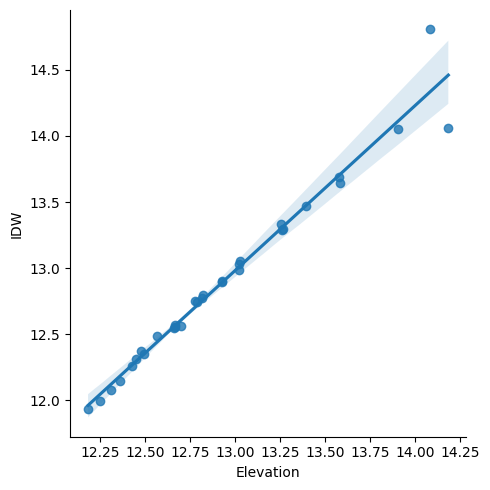

In [59]:
sns.lmplot(x="Elevation", y="IDW", data=nuorgam_als)

## Compute RMSE, MAE, MAXE, R2

In [60]:
MSE = mean_squared_error(nuorgam_als_actual, nuorgam_als_predicted)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.17681145003216284


In [61]:
MAE = mean_absolute_error(nuorgam_als_actual, nuorgam_als_predicted)

print("Mean Absolute Error:\n")
print(MAE)

Mean Absolute Error:

0.11840849070220001


In [62]:
# Compute max_error
MAXE = max_error(nuorgam_als_actual, nuorgam_als_predicted)

print("Maximum residual Error:\n")
print(MAXE)

Maximum residual Error:

0.7277976715493999


In [63]:
# Compute r2
R2 = r2_score(nuorgam_als_actual, nuorgam_als_predicted)

print("Coefficient of determination regression score:\n")
print(R2)

Coefficient of determination regression score:

0.8837173799049066


# Correlation testing Valle (Utsjoki)

In [64]:
valle_corr_asv = pd.read_csv('../data/output/0.25/valle_ASV_IDW_random_points.csv', delimiter=',')
valle_corr_asv_TIN = pd.read_csv('../data/output/0.25/valle_ASV_TIN_random_points.csv', delimiter=',')
valle_corr_als = pd.read_csv('../data/output/0.25/valle_ALS_random_points.csv', delimiter=',')

In [65]:
valle_corr_asv

,id,SAMPLE_1
0,0,-3.567644
1,1,-2.655939
2,2,-2.994284
3,3,-2.806739
4,4,-3.178693
...,...,...
295,295,-3.361742
296,296,-3.118646
297,297,-1.837714
298,298,-3.098584


In [66]:
valle_corr_asv["ALS_IDW"] = valle_corr_als["SAMPLE_4"]

In [67]:
valle_corr_asv

,id,SAMPLE_1,ALS_IDW
0,0,-3.567644,88.430109
1,1,-2.655939,88.295792
2,2,-2.994284,89.052633
3,3,-2.806739,88.067866
4,4,-3.178693,88.751447
...,...,...,...
295,295,-3.361742,89.740000
296,296,-3.118646,NaN
297,297,-1.837714,87.612876
298,298,-3.098584,NaN


In [68]:
valle_corr_asv['ASV_TIN'] = valle_corr_asv_TIN['SAMPLE_1']

In [69]:
valle_corr_asv

,id,SAMPLE_1,ALS_IDW,ASV_TIN
0,0,-3.567644,88.430109,-3.540
1,1,-2.655939,88.295792,-2.620
2,2,-2.994284,89.052633,-3.010
3,3,-2.806739,88.067866,-2.810
4,4,-3.178693,88.751447,-3.180
...,...,...,...,...
295,295,-3.361742,89.740000,-3.365
296,296,-3.118646,NaN,-3.125
297,297,-1.837714,87.612876,-1.855
298,298,-3.098584,NaN,-3.115


In [70]:
valle_corr_asv = valle_corr_asv.rename(columns={"SAMPLE_1": "ASV_IDW"})

In [71]:
valle_corr_asv

,id,ASV_IDW,ALS_IDW,ASV_TIN
0,0,-3.567644,88.430109,-3.540
1,1,-2.655939,88.295792,-2.620
2,2,-2.994284,89.052633,-3.010
3,3,-2.806739,88.067866,-2.810
4,4,-3.178693,88.751447,-3.180
...,...,...,...,...
295,295,-3.361742,89.740000,-3.365
296,296,-3.118646,NaN,-3.125
297,297,-1.837714,87.612876,-1.855
298,298,-3.098584,NaN,-3.115


In [72]:
valle_corr_asv = valle_corr_asv.dropna()

In [75]:
valle_corr_asv

,id,ASV_IDW,ALS_IDW,ASV_TIN
0,0,-3.567644,88.430109,-3.540
1,1,-2.655939,88.295792,-2.620
2,2,-2.994284,89.052633,-3.010
3,3,-2.806739,88.067866,-2.810
4,4,-3.178693,88.751447,-3.180
...,...,...,...,...
293,293,-3.387006,87.994366,-3.355
294,294,-2.996475,87.822089,-3.000
295,295,-3.361742,89.740000,-3.365
297,297,-1.837714,87.612876,-1.855


In [73]:
valle_corr_asv["ASV_IDW"].corr(valle_corr_asv["ALS_IDW"])  

-0.1520828076299014

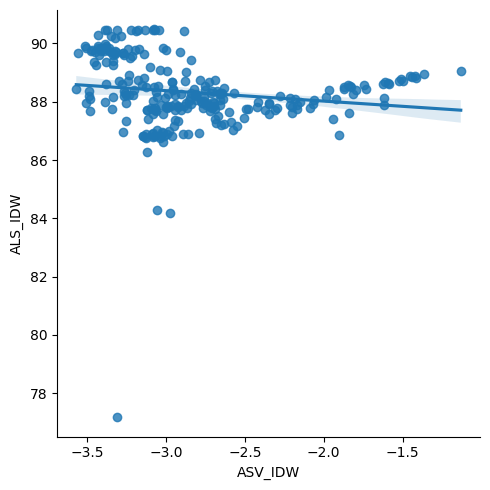

In [74]:
sns.lmplot(x="ASV_IDW", y="ALS_IDW", data=valle_corr_asv)

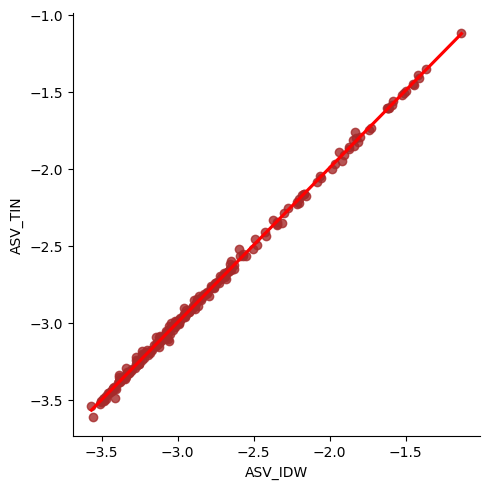

In [76]:
sns.lmplot(x="ASV_IDW", y="ASV_TIN",
            data=valle_corr_asv, line_kws={'color': 'red'}, scatter_kws={'color': 'brown'})

In [78]:
valle_corr_asv["ASV_IDW"].corr(valle_corr_asv["ASV_TIN"])  

0.999361444494639

# Correlation testing Nuorgam

In [80]:
nuorgam_corr_asv = pd.read_csv('../data/output/0.25/nuorgam_ASV_IDW_random_points.csv', delimiter=',')
nuorgam_corr_asv_TIN = pd.read_csv('../data/output/0.25/nuorgam_ASV_TIN_random_points.csv', delimiter=',')
nuorgam_corr_als = pd.read_csv('../data/output/0.25/nuorgam_ALS_random_points.csv', delimiter=',')

In [81]:
nuorgam_corr_als

,id,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6
0,0,10.22,10.44,10.315714,10.314406,7,0.069869
1,1,11.45,13.27,12.108478,12.159341,46,0.760946
2,2,11.40,13.07,11.632083,11.635015,24,0.434645
3,3,12.03,13.22,12.460833,12.461536,12,0.441276
4,4,11.79,13.25,12.200000,12.158013,4,0.607330
...,...,...,...,...,...,...,...
295,295,10.91,11.21,11.101176,11.110039,17,0.070451
296,296,10.33,13.24,10.895455,11.103198,11,1.044043
297,297,11.76,13.11,11.908750,11.862543,16,0.316067
298,298,10.79,10.96,10.866667,10.882804,9,0.055377


In [82]:
nuorgam_corr_asv["ALS_IDW"] = nuorgam_corr_als["SAMPLE_4"]

In [83]:
nuorgam_corr_asv

,id,SAMPLE_1,ALS_IDW
0,0,-2.317614,10.314406
1,1,-1.576809,12.159341
2,2,-1.505205,11.635015
3,3,-0.957730,12.461536
4,4,-1.280672,12.158013
...,...,...,...
295,295,-1.782876,11.110039
296,296,-2.111305,11.103198
297,297,-1.194525,11.862543
298,298,-1.991329,10.882804


In [84]:
nuorgam_corr_asv['ASV_TIN'] = nuorgam_corr_asv_TIN['SAMPLE_1']

In [85]:
nuorgam_corr_asv

,id,SAMPLE_1,ALS_IDW,ASV_TIN
0,0,-2.317614,10.314406,-2.325
1,1,-1.576809,12.159341,-1.560
2,2,-1.505205,11.635015,-1.495
3,3,-0.957730,12.461536,-0.965
4,4,-1.280672,12.158013,-1.337
...,...,...,...,...
295,295,-1.782876,11.110039,-1.790
296,296,-2.111305,11.103198,-2.115
297,297,-1.194525,11.862543,-1.180
298,298,-1.991329,10.882804,-2.000


In [86]:
nuorgam_corr_asv = nuorgam_corr_asv.rename(columns={"SAMPLE_1": "ASV_IDW"})

In [87]:
nuorgam_corr_asv["ASV_IDW"] = nuorgam_corr_asv["ASV_IDW"].fillna(0)

In [88]:
nuorgam_corr_asv

,id,ASV_IDW,ALS_IDW,ASV_TIN
0,0,-2.317614,10.314406,-2.325
1,1,-1.576809,12.159341,-1.560
2,2,-1.505205,11.635015,-1.495
3,3,-0.957730,12.461536,-0.965
4,4,-1.280672,12.158013,-1.337
...,...,...,...,...
295,295,-1.782876,11.110039,-1.790
296,296,-2.111305,11.103198,-2.115
297,297,-1.194525,11.862543,-1.180
298,298,-1.991329,10.882804,-2.000


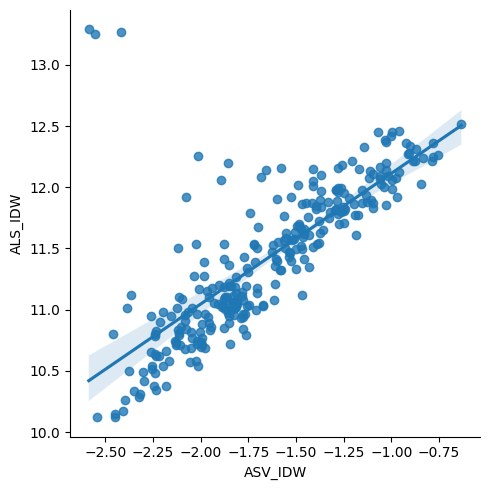

In [89]:
sns.lmplot(x="ASV_IDW", y="ALS_IDW", data=nuorgam_corr_asv)

In [90]:
nuorgam_corr_asv["ASV_IDW"].corr(nuorgam_corr_asv["ALS_IDW"])  

0.7647202734203874

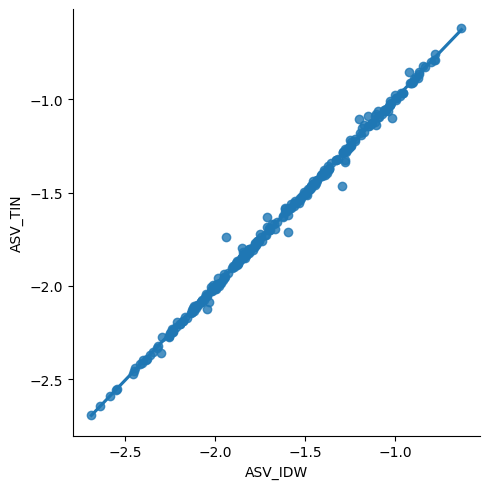

In [91]:
sns.lmplot(x="ASV_IDW", y="ASV_TIN", data=nuorgam_corr_asv)

In [93]:
nuorgam_corr_asv["ASV_IDW"].corr(nuorgam_corr_asv["ASV_TIN"])

0.9986093929245317

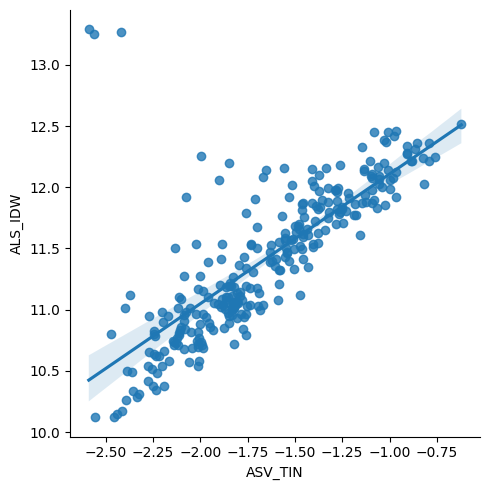

In [89]:
sns.lmplot(x="ASV_TIN", y="ALS_IDW", data=nuorgam_corr_asv)

In [90]:
nuorgam_corr_asv["ASV_TIN"].corr(nuorgam_corr_asv["ALS_IDW"])  

0.7612046269392452